In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

In [52]:
# set up time array
time_length = 120 # seconds
dt = 0.0001 # seconds

#set up object momoments of inertia
I1, I2, I3 = 0.12, 0.06, 0.03 # kg m^2
I = np.diag([I1, I2, I3])

In [53]:
def simulate(omega0):
    n_steps = int(time_length/dt)
    omega = np.array([0, omega0, 0.2])
    intermediate_omega = np.zeros(n_steps)
    
    for i in range(n_steps):
        # Calculate the angular acceleration at the current time step
        omega_dot = np.zeros(3)
        omega_dot[0] = (I2 - I3) * omega[1] * omega[2] / I1
        omega_dot[1] = (I3 - I1) * omega[0] * omega[2] / I2
        omega_dot[2] = (I1 - I2) * omega[0] * omega[1] / I3
        
        # Save the current value of omega[1]
        intermediate_omega[i] = omega[1]
        
        # Update the angular velocities
        omega = omega + omega_dot * dt

    return intermediate_omega


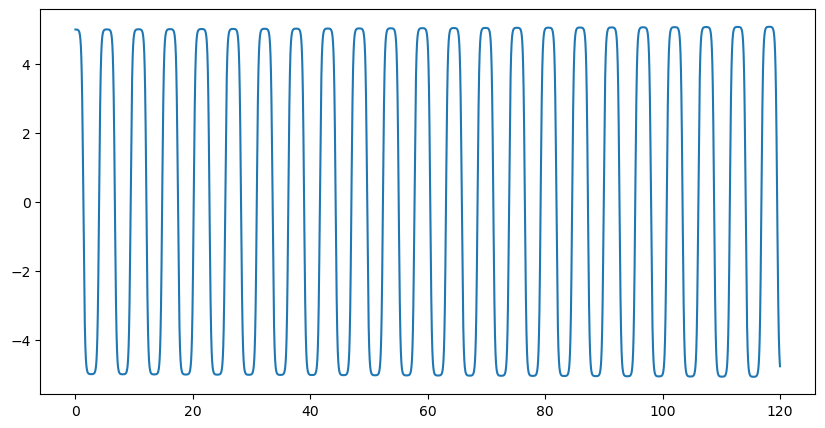

In [54]:
# test simulate function
omega0 = 5
intermediate_omega = simulate(omega0)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, time_length, dt), intermediate_omega)

In [55]:
def get_freq(intermediate_omega):
    N = len(intermediate_omega)
    yf = fft(intermediate_omega)
    T = dt
    xf = fftfreq(N, T)[:N//2]   # positive frequencies
    magnitudes = abs(yf[:N//2]) # magnitude spectrum

    # identify dominant frequency
    dom_i = np.argmax(magnitudes)
    dom_freq = xf[dom_i]
    dom_mag = magnitudes[dom_i]

    # calculate peak-to-noise ratio
    noise_mag = np.delete(magnitudes, dom_i)
    noise_level = np.mean(noise_mag)
    peak_to_noise_ratio = dom_mag / noise_level if noise_level != 0 else np.inf
    period = 1 / dom_freq if dom_freq != 0 else np.inf

    return dom_freq, period, peak_to_noise_ratio

print(get_freq(intermediate_omega))

(0.18333333333333332, 5.454545454545455, 64685.779763338614)


omega0: 5.0, dominant frequency: 0.18333333333333332, period: 5.454545454545455, peak-to-noise ratio: 64685.779763338614
omega0: 5.526315789473684, dominant frequency: 0.2, period: 5.0, peak-to-noise ratio: 209602.83715237444
omega0: 6.052631578947368, dominant frequency: 0.21666666666666667, period: 4.615384615384615, peak-to-noise ratio: 1083466.1326080433
omega0: 6.578947368421053, dominant frequency: 0.23333333333333334, period: 4.285714285714286, peak-to-noise ratio: 156467.16909410935
omega0: 7.105263157894736, dominant frequency: 0.25, period: 4.0, peak-to-noise ratio: 51065.7966538632
omega0: 7.631578947368421, dominant frequency: 0.2583333333333333, period: 3.8709677419354844, peak-to-noise ratio: 70319.29938752456
omega0: 8.157894736842106, dominant frequency: 0.275, period: 3.6363636363636362, peak-to-noise ratio: 447115.0432387537
omega0: 8.68421052631579, dominant frequency: 0.2916666666666667, period: 3.4285714285714284, peak-to-noise ratio: 107162.27224962469
omega0: 9.2

Text(0, 0.5, 'Dominant frequency (Hz)')

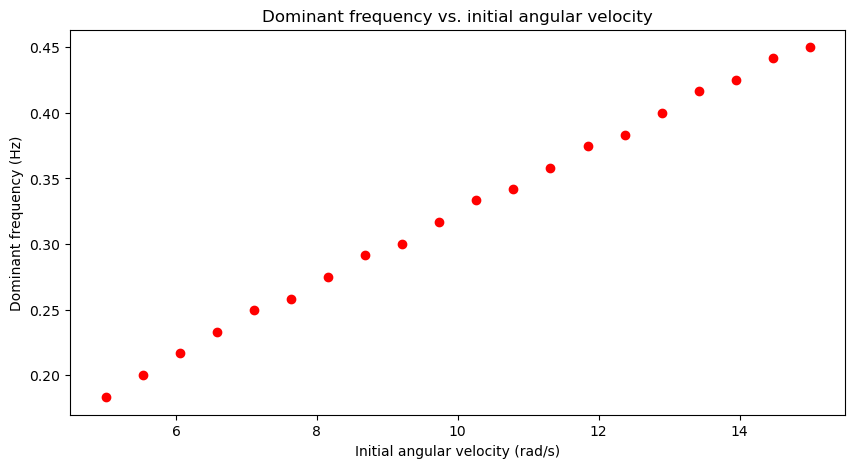

In [58]:
omega0s = np.linspace(5, 15, 20)
plt.figure(figsize=(10, 5))
for omega0 in omega0s:
    intermediate_omega = simulate(omega0)
    dom_freq, period, peak_to_noise_ratio = get_freq(intermediate_omega)
    plt.scatter(omega0, dom_freq, c='r')
    print(f'omega0: {omega0}, dominant frequency: {dom_freq}, period: {period}, peak-to-noise ratio: {peak_to_noise_ratio}')

plt.title('Dominant frequency vs. initial angular velocity')
plt.xlabel('Initial angular velocity (rad/s)')
plt.ylabel('Dominant frequency (Hz)')
